# Clustering Penguins

In this notebook, we'll perform clustering on the Penguins dataset using K-means. We'll train on a subset of the data and see how our model generalizes to new, unseen penguins.

## 1. Load and clean the dataset.

I've done this for you.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<Axes: >

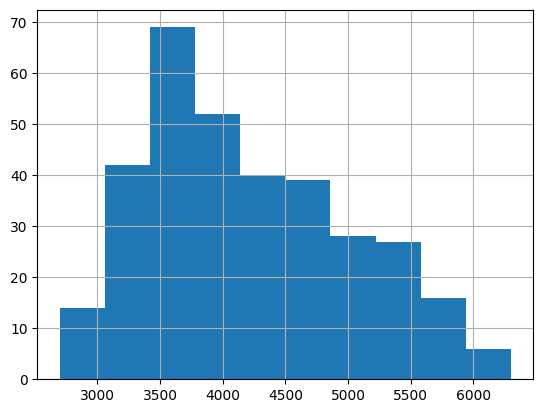

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/datasets/penguins.csv')
df = df.dropna()
df = df.drop([9, 14])

# Inspect the results
df.head()

df.body_mass_g.hist()

## 2. Create train/test split

Before we begin processing, let's split our data into training and test sets (80/20 split) using sklearn's train_test_split.

```python
from sklearn.model_selection import train_test_split

# Create train/test split (20% test)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set size: {len(df_train)}")
print(f"Test set size: {len(df_test)}")
```

In [ ]:
from sklearn.model_selection import train_test_split

# Create train/test split (20% test)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set size: {len(df_train)}")
print(f"Test set size: {len(df_test)}")

Training set size: 266
Test set size: 67


## 3. One-Hot Encode Categorical Variables

We think the penguin `sex` might be useful for our clustering. Let's one-hot encode it for both train and test sets.

```python
# One-hot encode training data
df_train = pd.get_dummies(df_train).drop("sex_.", axis=1, errors="ignore")

# One-hot encode test data
df_test = pd.get_dummies(df_test).drop("sex_.", axis=1, errors="ignore")
```

*Inspect both dataframes after you've done this.*

In [ ]:
# One-hot encode training data
df_train = pd.get_dummies(df_train).drop("sex_.", axis=1, errors="ignore")

# One-hot encode test data
df_test = pd.get_dummies(df_test).drop("sex_.", axis=1, errors="ignore")

df_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
231,49.0,16.1,216.0,5550.0,False,True
85,41.3,20.3,194.0,3550.0,False,True
304,44.9,13.8,212.0,4750.0,True,False
23,38.2,18.1,185.0,3950.0,False,True
30,39.5,16.7,178.0,3250.0,True,False
...,...,...,...,...,...,...
195,45.5,17.0,196.0,3500.0,True,False
78,36.2,16.1,187.0,3550.0,True,False
113,42.2,19.5,197.0,4275.0,False,True
278,43.2,14.5,208.0,4450.0,True,False


## 4. Scale the features

We'll scale the features to standardize them. Remember to fit the scaler on training data only!

**Note:** Because this is an unsupervised algorithm, all features in our dataframe become our feature matrix X!

```python
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train = pd.DataFrame(
    scaler.fit_transform(df_train),
    columns=df_train.columns,
    index=df_train.index
)

# Transform test data using the fitted scaler
X_test = pd.DataFrame(
    scaler.transform(df_test),
    columns=df_test.columns,
    index=df_test.index
)
```

*Inspect both X_train and X_test after scaling.*

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

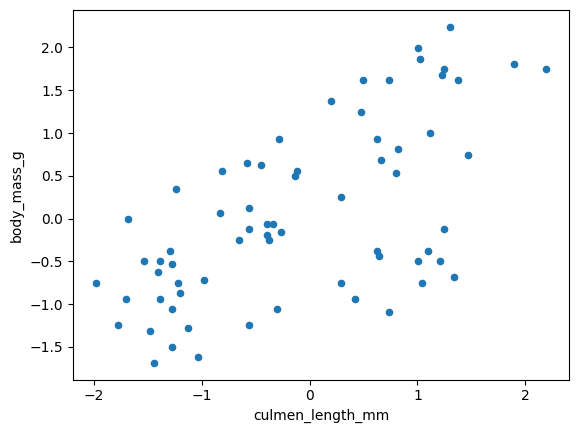

In [ ]:
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train = pd.DataFrame(
    scaler.fit_transform(df_train),
    columns=df_train.columns,
    index=df_train.index
)

# Transform test data using the fitted scaler
X_test = pd.DataFrame(
    scaler.transform(df_test),
    columns=df_test.columns,
    index=df_test.index
)

X_test.plot(kind="scatter", x="culmen_length_mm", y="body_mass_g")

## 5. PCA

In addition to scaling, we'll reduce the number of features using Principal Component Analysis (PCA). Again, fit only on training data!

```python
# First, determine optimal number of components using training data
pca = PCA(n_components=None)
pca_temp = pca.fit(X_train)
n_components = sum(pca_temp.explained_variance_ratio_ > 0.1)
print(f"Number of components with variance > 0.1: {n_components}")

# Now fit PCA with optimal components
pca = PCA(n_components=n_components)
X_train = pd.DataFrame(
    pca.fit_transform(X_train),
    index=X_train.index
)

# Transform test data
X_test = pd.DataFrame(
    pca.transform(X_test),
    index=X_test.index
)
```

*Inspect both X_train and X_test, as well as n_components.*

Number of components with variance > 0.1: 2


<Axes: xlabel='0', ylabel='1'>

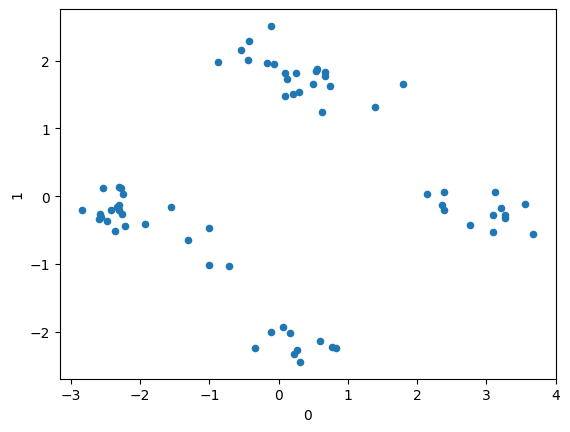

In [ ]:
# First, determine optimal number of components using training data
pca = PCA(n_components=None)
pca_temp = pca.fit(X_train)
n_components = sum(pca_temp.explained_variance_ratio_ > 0.1)
print(f"Number of components with variance > 0.1: {n_components}")

# Now fit PCA with optimal components
pca = PCA(n_components=n_components)
X_train = pd.DataFrame(
    pca.fit_transform(X_train),
    index=X_train.index
)

# Transform test data
X_test = pd.DataFrame(
    pca.transform(X_test),
    index=X_test.index
)

X_test


X_test.plot(kind="scatter", x=0, y=1)

## 6. Determine the Number of Clusters

You can either guess the number of clusters or use the elbow method to find the optimal k. We'll use the training data for this.

```python
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
```

Look for the "elbow" in the plot where adding more clusters shows diminishing returns.

Pick a number that feels right and assign it to `n_clusters`:

```python
n_clusters = ...
```

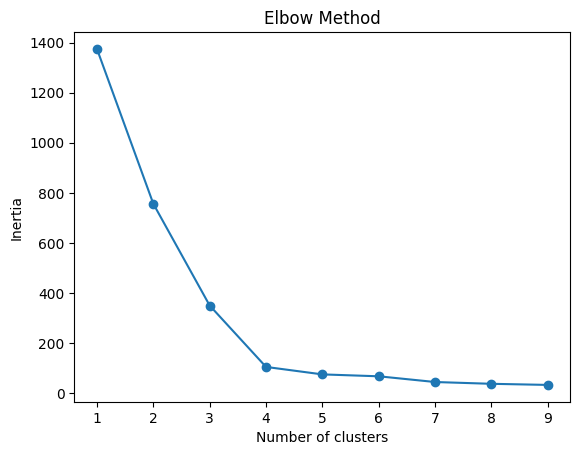

In [ ]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


## 7. K-means Clustering

Apply K-means clustering with your chosen number of clusters.

```python
# Fit K-means on training data
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_train)

# Get cluster assignments for training data
train_clusters = kmeans.labels_

# Visualize the training clusters on the first two principal components
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=train_clusters, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering on Training Data (K={n_clusters})")
plt.show()
```

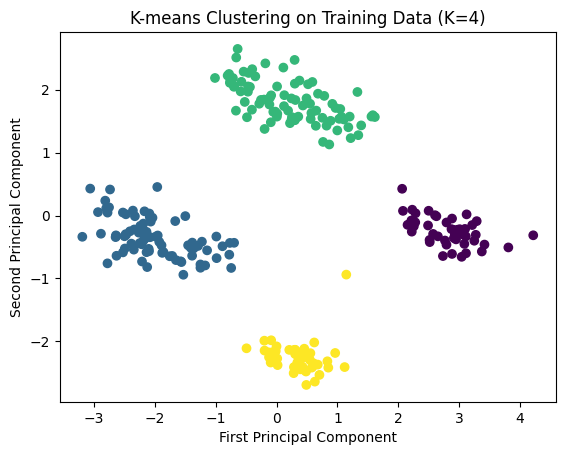

In [ ]:
n_clusters = 4


# Fit K-means on training data
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_train)

# Get cluster assignments for training data
train_clusters = kmeans.labels_

# Visualize the training clusters on the first two principal components
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=train_clusters, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering on Training Data (K={n_clusters})")
plt.show()



## 8. Predict on Test Set

Now let's apply our clustering model to the test set. While we can't evaluate accuracy (no ground truth labels in unsupervised learning!), we can see how the model assigns clusters to new data.

```python
# Predict clusters for test data
y_pred = kmeans.predict(X_test)

# Show cluster distribution in test set
print("Test set cluster distribution:")
print(pd.Series(y_pred).value_counts().sort_index())

# Visualize test set predictions
plt.figure(figsize=(12, 5))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=train_clusters, cmap="viridis", alpha=0.6)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"Training Data Clusters (K={n_clusters})")

# Plot test data
plt.subplot(1, 2, 2)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap="viridis", alpha=0.6)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"Test Data Predictions")

plt.tight_layout()
plt.show()

# This clustering could be useful for:
# - Identifying different penguin subgroups for conservation efforts
# - Understanding natural groupings in the population
# - Feature engineering for supervised learning tasks
print("\nClustering complete! These groups could represent different penguin subpopulations or behavioral patterns.")
```

Test set cluster distribution:
0    13
1    22
2    22
3    10
Name: count, dtype: int64


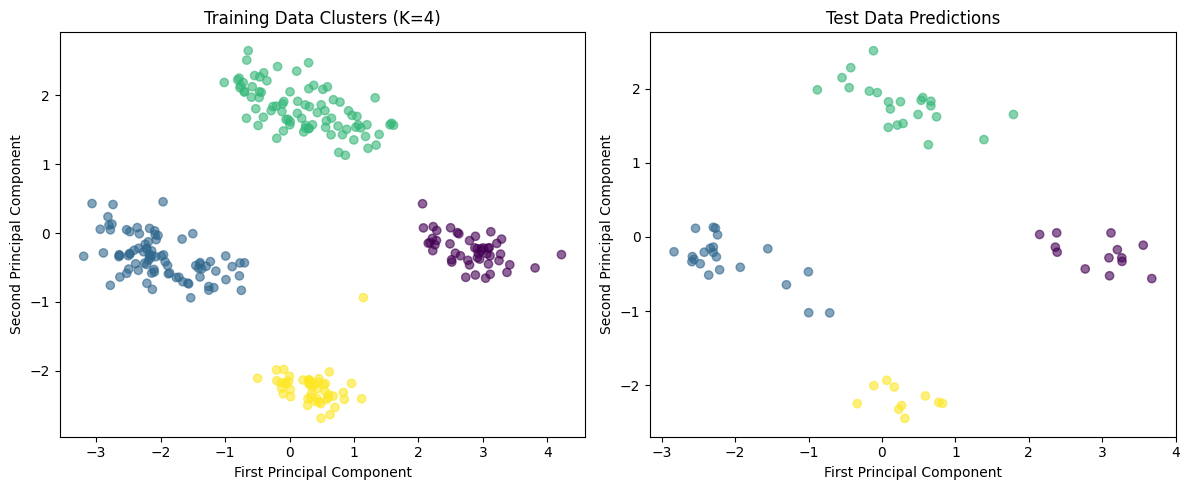


Clustering complete! These groups could represent different penguin subpopulations or behavioral patterns.


In [ ]:

# Predict clusters for test data
y_pred = kmeans.predict(X_test)

# Show cluster distribution in test set
print("Test set cluster distribution:")
print(pd.Series(y_pred).value_counts().sort_index())

# Visualize test set predictions
plt.figure(figsize=(12, 5))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=train_clusters, cmap="viridis", alpha=0.6)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"Training Data Clusters (K={n_clusters})")

# Plot test data
plt.subplot(1, 2, 2)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap="viridis", alpha=0.6)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"Test Data Predictions")

plt.tight_layout()
plt.show()

# This clustering could be useful for:
# - Identifying different penguin subgroups for conservation efforts
# - Understanding natural groupings in the population
# - Feature engineering for supervised learning tasks
print("\nClustering complete! These groups could represent different penguin subpopulations or behavioral patterns.")







